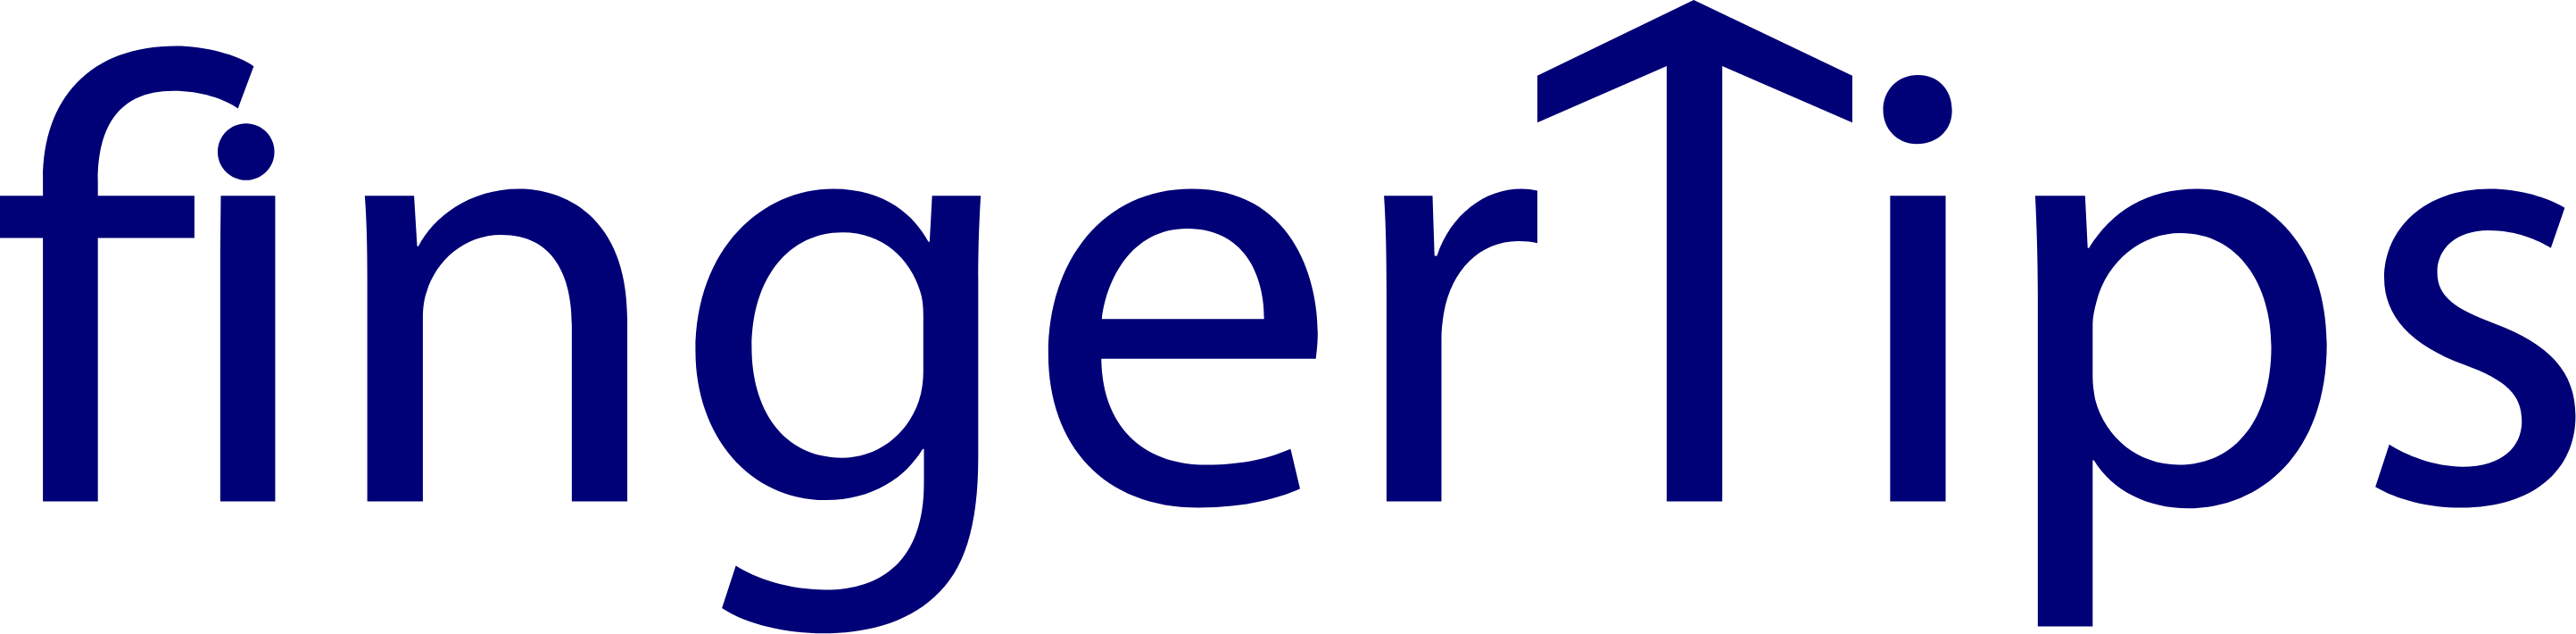

# INFERENTIAL STATISTICS

## Data Description

The mtcars dataset is a built-in dataset in R that contains measurements on 11 different attributes for 32 different cars.

1. 'Unnamed: 0'-->car types-->string
2. 'mpg'-->Miles per gallon is the determinant of fuel efficiency-->continuous
3. 'cyl'-->Number of cylinders-->nominal
4. 'disp'-->displacement-->continuous
5. 'hp'-->hourse power-->continuous
6. 'drat'-->	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle-->continuous
7. 'wt'-->The overall weight of the vehicle per 1000lbs (half US ton)-->continuous
8. 'qsec'-->Fastest time to travel 1/4 mile from standstill (in seconds).-->continuous
9. 'vs'-->Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1).-->nominal
10. 'am'-->A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.-->nominal
11. 'gear'-->Number of gears in the transmission. Manual transmissions have either 4 or 5 forward gears; Automatic either 3 or 4-->ordinal
12. 'carb'-->number of carburators-->ordinal

### Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### Loading the dataset

In [67]:
df=pd.read_csv('mtcars.csv')
df.sample(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2


#### Shape & Size of data

In [68]:
df.shape

(32, 12)

##### Observations : 
1. Number of rows = 32
2. Number of columns = 12

#### We will answer following questions using Inferential Statistics:
1. Do mpg of cars which are automatic differ from cars which are manual?
2. Is the proportion of gears significantly different for different transmission configuration?
3. Is the distribution of weight of automatic cars differ for different number of cylinders?
4. Is the distribution of weight of manual cars differ for different number of cylinders?
5. Does mpg of v-shape engine differ from straight line engine?

### Q.1  Do mpg of cars which are automatic differ from cars which are manual?

#### Step-1 
we will first check the graph between transmission configuration and mpg , which will give us a basic idea to make our hypothesis statements.
#### Observations 
From graph below, we can say that cars which are manual gives more mpg or fuel efficiency. Let's find out more evidence from Statistical analysis.

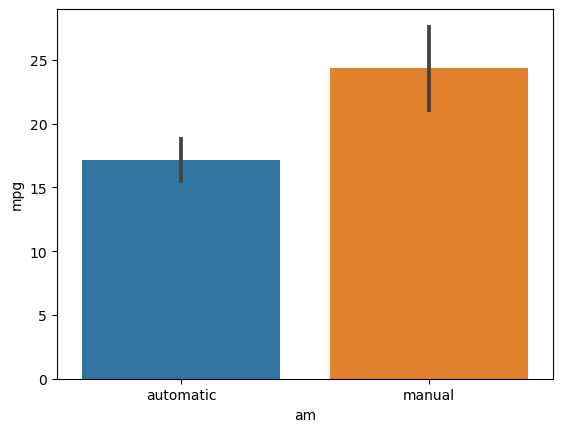

In [110]:
sns.barplot(x='am',y='mpg',data=df)
plt.xticks(ticks=[0,1], labels=['automatic', 'manual'])
plt.show()
#manual(am=1), automatic(am=0)

#### Step-2
HYPOTHESIS STATEMENTS :

H0 ( Null Hypothesis ) = Manual cars have equal mpg as automatic cars.

Ha ( Alternate Hypothesis ) = Manual cars don't have equal mpg as automatic cars.

We will perform Independent T-test here. To determine if there is a significant difference between two groups we must set a p-value before hand; if the test produces a p-value which is less than the set p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05.

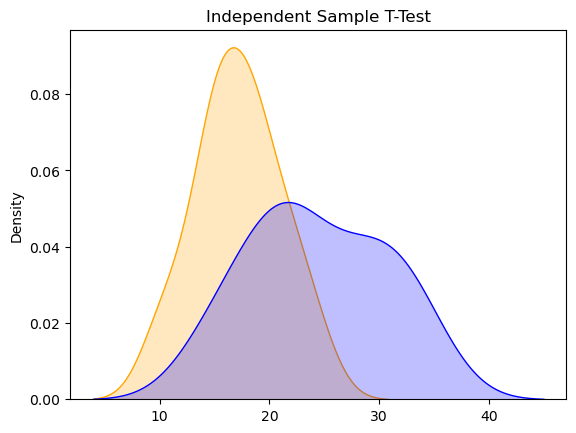

In [111]:
# To run an Independent Sample T-Test using python , let us first generate two samples 'auto' and 'manual'
auto= np.array(df[df.am == 0].mpg) #automatic cars
manual= np.array(df[df.am == 1].mpg) #manual cars
#Using the seaborn python library to generate a histogram of our 2 samples outputs the following.
sns.kdeplot(auto, shade=True, color='orange')
sns.kdeplot(manual, shade=True, color='blue')
plt.title("Independent Sample T-Test")
plt.show()

#### Step-3
We will now test statistically whether these two samples have a different mean using the T-Test. For that, we have to define our Null and Alternate Hypothesis. (Defined Above)

Null Hypothesis: µa = µb (the means of both populations are equal)

Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

Python has a popular statistical package called scipy which has implemented the T-Test in its statistics module. To run a Python Independent Sample T-Test we do so as below.
#### Observations :
A small p -value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. A large p -value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

In [112]:
from scipy import stats
tStat, pValue = stats.ttest_ind(auto, manual, equal_var=False)
# ttest_ind function runs the independent sample T-Test and outputs a P-Value and the Test-Statistic.

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0013736383330710345 T-Statistic:-3.767123145144923


#### CONCLUSION :
Here , P-Value:0.00137363833307103453
It's a very small value < 0.05 . So , we have a strong evidence with 95% confidence against the null hypothesis, so we reject the null hypothesis. It means that - Manual cars don't have equal mpg as automatic cars.

### Q.2 Is the proportion of gears significantly different for different transmission configuration(automatic or manual)?

#### Step-1 
am and gear, both are categorical columns, Let's see if there is any relatiopnship between the two .

we will first check the graph between transmission configuration(am) and number of gears(gear) , which will give us a basic idea to make our hypothesis statements.

#### Observations 
From graph below, we can say that cars which have 3 gears only automatic(0) type, while cars which have 5 gears are manual(1) type and cars with 4 gears are mostly manual but few are automatic as well. Let's find out more evidence from Statistical analysis.

<AxesSubplot:xlabel='gear', ylabel='count'>

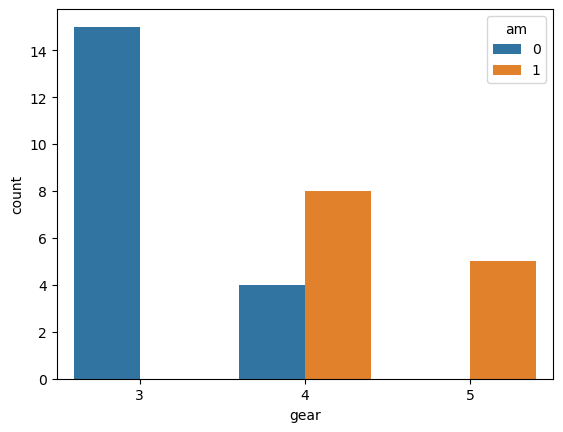

In [113]:
sns.countplot('gear', hue='am', data=df)

#### Step-2
HYPOTHESIS STATEMENTS :

H0 ( Null Hypothesis )= Proportion of gears is equal in different transmission configuration(manual or automatic).

Ha ( Alternate Hypothesis ) = Proportion of gears is differs in different transmission configuration(manual or automatic).

To determine the statistical significance of two independent categorical groups of data .
We use the "Chi-squared test"

In [114]:
# We'll assign 'am' and 'gear' to a new dataframe 'am_gear'.
import math
am_gear = df[['am', 'gear']]
am_gear.sample(5)

,am,gear
23,0,3
28,1,5
4,0,3
19,1,4
13,0,3


In [115]:
df['am'].value_counts() #To find out the total numbers of automatic and manual cars

0    19
1    13
Name: am, dtype: int64

In [116]:
df['gear'].value_counts() #To find out the total numbers of gears(3, 4 or 5)

3    15
4    12
5     5
Name: gear, dtype: int64

#### Step-3
we will now construct the Contingency Table, we can accomplish this by using the pd.crosstab() function in pandas. Each cell in this table represents a frequency count

and then **chi2_contingency()** method conducts the Chi-square test on a contingency table 

In [117]:
contingency_table = pd.crosstab(
    df['am'],
    df['gear'],
    #margins = True
)
contingency_table 

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


In [118]:
## chi2_contingency() method conducts the Chi-square test on a contingency table 
stats.chi2_contingency(contingency_table)

(20.944669365721996,
 2.8308889589756233e-05,
 2,
 array([[8.90625, 7.125  , 2.96875],
        [6.09375, 4.875  , 2.03125]]))

#### Observation :
The first value (20.944669365721996) is the Chi-square value, then p-value (2.8308889589756233e-05), then comes the degrees of freedom (2), and lastly it outputs the expected frequencies as an array.

#### CONCLUSION
Here , P-Value: 2.8308889589756233e-05
The p-value is less than 0.05 . So , we have a strong evidence against the null hypothesis, so we reject the null hypothesis.
It means that - "Proportion of gears is differs in different transmission configuration(manual or automatic)."

### Q.3 Is the distribution of weight of automatic cars differ for different number of cylinders?

ANOVA is used when one wants to compare the means of a condition between more than 2 groups. Here we have 3 groups, wt, am, cyl .So, we use ANOVA (analysis of variance) testing

#### Step-1
HYPOTHESIS STATEMENTS :

H0 ( Null Hypothesis )= Distribution of weight across automatic cars with 4, 6 and 8 cylinders is same.

Ha ( Alternate Hypothesis ) = Distribution of weight across automatic cars with 4, 6 and 8 cylinders is different.

In [119]:
#Construct a dataframe with only 'automatic' cars
df_auto= df[df.am == 0] 
df_auto.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2


In [120]:
df_auto=df_auto[['wt', 'am', 'cyl']]
df_auto.head(5)

,wt,am,cyl
3,3.215,0,6
4,3.440,0,8
5,3.460,0,6
6,3.570,0,8
7,3.190,0,4


#### Probability Distribution of weight of automatic cars with respect to number of cylinders

<AxesSubplot:ylabel='Density'>

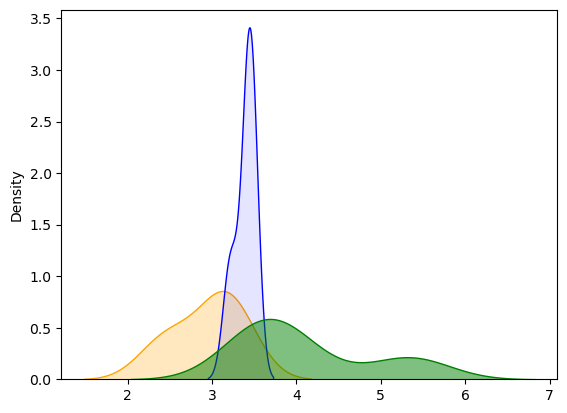

In [121]:
cyl4= np.array(df_auto[df_auto.cyl == 4].wt) 
cyl6= np.array(df_auto[df_auto.cyl == 6].wt)  
cyl8= np.array(df_auto[df_auto.cyl == 8].wt)  

sns.kdeplot(cyl4, shade=True, color='orange')
sns.kdeplot(cyl6, shade=True, color='blue', alpha=0.1)
sns.kdeplot(cyl8, shade=True, color='green', alpha=0.5)

#### Observations :
1. On incresing weight(>4) probability density of automatic cars having 8 cylinders increases
2. On decreasing weight(<3) probability density of automatic cars having 4 cylinders increases
3. Between 3 to 4 probability density of automatic cars having 6 cylinders is highest.

#### Step-2
ANOVA with scipy.stats : If using scipy.stats, the method needed is stats.f_oneway() . The general applied method looks like this:

SYNTAX : stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

In [122]:
import scipy.stats as ss
ss.f_oneway(df_auto['wt'][df_auto.cyl==4], 
            df_auto['wt'][df_auto.cyl==6],
            df_auto['wt'][df_auto.cyl==8])
#Since we have to check distribution for Automaic cars with 4, 6, or 8 cylinders 

F_onewayResult(statistic=4.675147182145808, pvalue=0.0251823240323204)

#### CONCLUSION 
Here , P-Value: pvalue=0.02518232403232041
The p-value is less than 0.05 . So , we have a strong evidence against the null hypothesis, hence we reject the null hypothesis.
It means that - "Distribution of weight across automatic cars with 4 cylinders, 6 cyliners & 8 cylinders is different"

### Q.4 Is the distribution of weight of manual cars differ for different number of cylinders?

ANOVA is used when one wants to compare the means of a condition between more than 2 groups. Here we have 3 groups, wt, am, cyl .So, we use ANOVA (analysis of variance) testing

#### Step-1
HYPOTHESIS STATEMENTS :

H0 ( Null Hypothesis )= Distribution of weight across manual cars with 4, 6 and 8 cylinders is same.

Ha ( Alternate Hypothesis ) = Distribution of weight across manual cars with 4, 6 and 8 cylinders is different.

In [123]:
#Construct a dataframe with only 'manual' cars
df_manual= df[df.am == 1] 
df_manual.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [124]:
df_manual=df_manual[['wt', 'am', 'cyl']]
df_manual.head(5)

,wt,am,cyl
0,2.620,1,6
1,2.875,1,6
2,2.320,1,4
17,2.200,1,4
18,1.615,1,4


#### Probability Distribution of weight of manual cars with respect to number of cylinders

<AxesSubplot:ylabel='Density'>

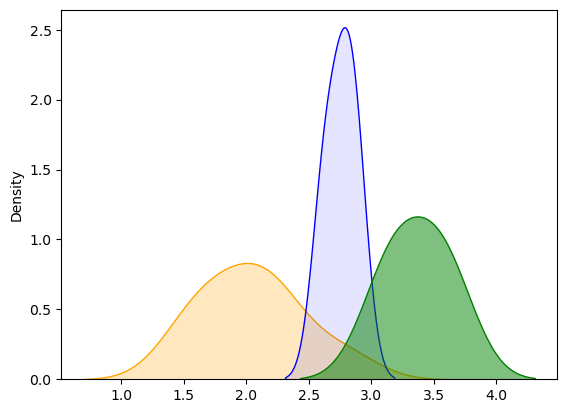

In [125]:
cyl_4= np.array(df_manual[df_manual.cyl == 4].wt) 
cyl_6= np.array(df_manual[df_manual.cyl == 6].wt)  
cyl_8= np.array(df_manual[df_manual.cyl == 8].wt)  

sns.kdeplot(cyl_4, shade=True, color='orange')
sns.kdeplot(cyl_6, shade=True, color='blue', alpha=0.1)
sns.kdeplot(cyl_8, shade=True, color='green', alpha=0.5)

#### Observations :
1. On incresing weight(>3) probability density of automatic cars having 8 cylinders increases
2. On decreasing weight(<2.4) probability density of automatic cars having 4 cylinders increases
3. Between 2.4 to 3 probability density of automatic cars having 6 cylinders is highest.

#### Step-2
ANOVA with scipy.stats : If using scipy.stats, the method needed is stats.f_oneway() . The general applied method looks like this:

SYNTAX : stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

In [126]:
import scipy.stats as ss
ss.f_oneway(df_manual['wt'][df_manual.cyl==4], 
            df_manual['wt'][df_manual.cyl==6],
            df_manual['wt'][df_manual.cyl==8])
#Since we have to check distribution for Automaic cars with 4, 6, or 8 cylinders 

F_onewayResult(statistic=12.763058172899878, pvalue=0.0017671008314547485)

#### CONCLUSION 
Here , P-Value: pvalue=0.0017671008314547485
The p-value is less than 0.05 . So , we have a strong evidence against the null hypothesis, hence we reject the null hypothesis.
It means that - "Distribution of weight across automatic cars with 4 cylinders, 6 cyliners & 8 cylinders is different"

### Q.5 Does mpg of v-shape engine differ from straight line engine?

#### Step-1 
we will first check the graph between engine cylinder configuration(vs) and mpg, which will give us a basic idea to make our hypothesis statements.
#### Observations 
From graph below, we can say that cars which have straight line cylinders gives more mpg or fuel efficiency. Let's find out more evidence from Statistical analysis.

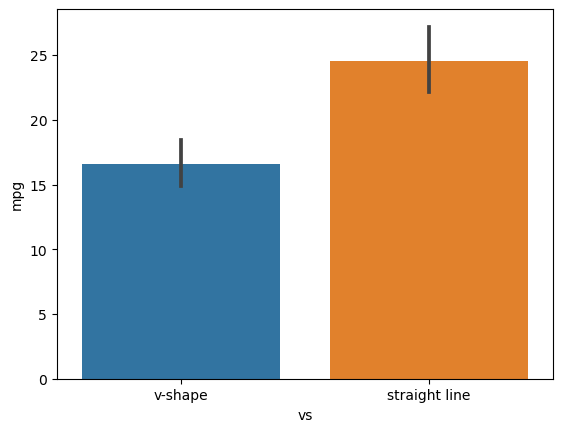

In [127]:
sns.barplot(x='vs',y='mpg',data=df)
plt.xticks(ticks=[0,1], labels=['v-shape', 'straight line'])
plt.show()
#v-shape(vs=0), straight line(vs=1)

#### Step-2
HYPOTHESIS STATEMENTS :

H0 ( Null Hypothesis ) = v-shape cylinder cars have equal mpg as straight line cylinder cars.

Ha ( Alternate Hypothesis ) = v-shape cylinder cars have different mpg as straight line cylinder cars.

We will perform Independent T-test here. To determine if there is a significant difference between two groups we must set a p-value before hand; if the test produces a p-value which is less than the set p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05.

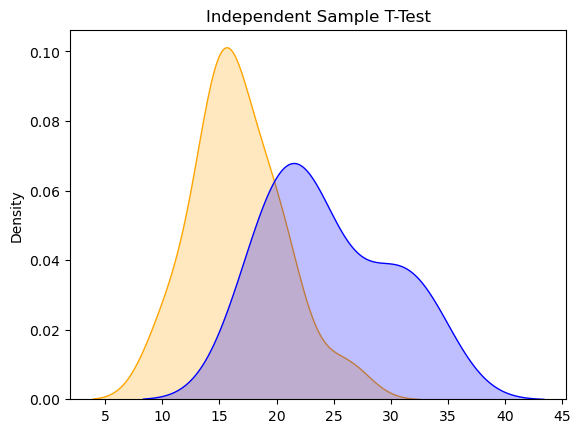

In [128]:
# To run an Independent Sample T-Test using python , let us first generate two samples v_shape and s_shape
v_shape= np.array(df[df.vs == 0].mpg) #v shape
s_shape= np.array(df[df.vs == 1].mpg) #straight line
#Using the seaborn python library to generate a histogram of our 2 samples outputs the following.
sns.kdeplot(v_shape, shade=True, color='orange')
sns.kdeplot(s_shape, shade=True, color='blue')
plt.title("Independent Sample T-Test")
plt.show()

#### Step-3
We will now test statistically whether these two samples have a different mean using the T-Test. For that, we have to define our Null and Alternate Hypothesis. (Defined Above)

Null Hypothesis: µa = µb (the means of both populations are equal)

Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

Python has a popular statistical package called scipy which has implemented the T-Test in its statistics module. To run a Python Independent Sample T-Test we do so as below.
#### Observations :
A small p -value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. A large p -value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

In [129]:
from scipy import stats
tStat, pValue = stats.ttest_ind(v_shape, s_shape, equal_var=False)
# ttest_ind function runs the independent sample T-Test and outputs a P-Value and the Test-Statistic.

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.00010983680112365942 T-Statistic:-4.667052730251419


#### CONCLUSION :
Here , P-Value:0.00010983680112365942
It's a very small value < 0.05 . So , we have a strong evidence with 95% confidence against the null hypothesis, so we reject the null hypothesis. It means that - v-shape cylinder cars have different mpg as straight line cylinder cars..

### Type-1 and Type-2 error

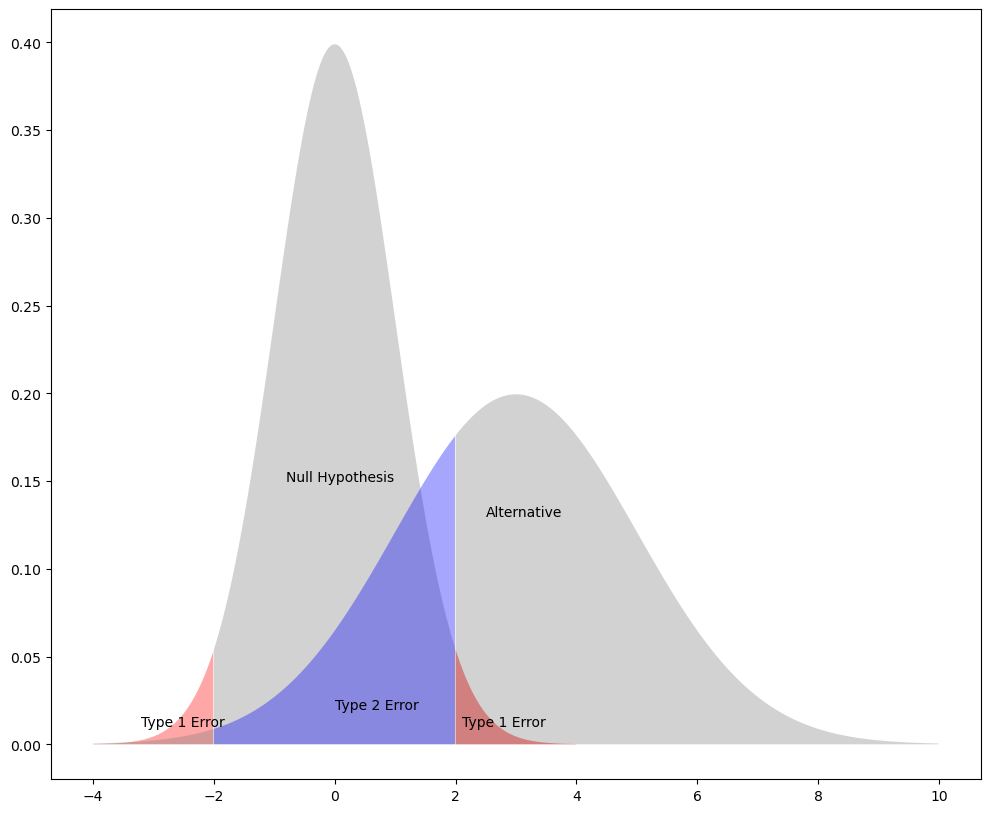

In [5]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

**END OF DOCUMENT**